In [7372]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [7373]:
csv_link="../dataset/percobaan.csv"

In [7374]:
# TODO: Create more data
dataframe = pd.read_csv(csv_link)

In [7375]:
dataframe.head()

,Skintone,Season,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,white,spring,239,124,142,250,232,224,182,226,211,216,167,177
1,white,summer,232,180,184,238,214,211,164,147,147,103,89,94
2,white,spring,251,231,198,180,248,200,160,231,229,255,174,188
3,white,summer,5,68,94,24,154,180,117,230,218,212,241,244
4,white,summer,231,210,204,185,183,189,134,139,142,238,237,231


In [7376]:
dataframe = pd.get_dummies(dataframe, columns=['Skintone', 'Season'])
dataframe

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone_darkbrown,Skintone_olive,Skintone_white,Season_autumn,Season_spring,Season_summer,Season_winter
0,239,124,142,250,232,224,182,226,211,216,167,177,False,False,True,False,True,False,False
1,232,180,184,238,214,211,164,147,147,103,89,94,False,False,True,False,False,True,False
2,251,231,198,180,248,200,160,231,229,255,174,188,False,False,True,False,True,False,False
3,5,68,94,24,154,180,117,230,218,212,241,244,False,False,True,False,False,True,False
4,231,210,204,185,183,189,134,139,142,238,237,231,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,162,196,224,247,203,45,13,101,157,19,144,224,False,False,True,False,True,False,False
316,240,237,224,67,63,48,151,12,16,145,142,128,False,True,False,True,False,False,False
317,231,132,132,252,164,162,71,211,206,200,244,249,False,False,True,False,True,False,False
318,47,243,224,255,128,0,224,157,96,31,57,96,True,False,False,False,True,False,False


In [7377]:
train_dataset = dataframe.sample(frac=0.8, random_state=9) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within 
test_dataset = dataframe.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone_darkbrown,Skintone_olive,Skintone_white,Season_autumn,Season_spring,Season_summer,Season_winter
31,66,151,160,244,234,230,229,127,132,47,80,97,True,False,False,False,True,False,False
95,187,167,140,239,234,228,244,198,212,243,219,178,False,False,True,False,True,False,False
109,153,176,176,181,178,176,252,250,240,138,158,160,True,False,False,False,False,False,True
310,58,106,89,167,168,138,214,193,138,185,200,188,False,False,True,False,False,False,True
98,255,176,103,255,237,134,162,220,231,248,204,220,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,180,170,169,255,240,223,248,250,253,240,201,179,True,False,False,True,False,False,False
199,225,161,64,83,34,0,239,207,160,145,65,16,False,True,False,True,False,False,False
157,94,55,109,189,151,203,243,234,192,116,112,128,False,False,True,False,False,True,False
203,25,2,4,255,137,118,203,78,71,255,203,164,False,False,True,False,False,True,False


In [7378]:
test_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone_darkbrown,Skintone_olive,Skintone_white,Season_autumn,Season_spring,Season_summer,Season_winter
1,232,180,184,238,214,211,164,147,147,103,89,94,False,False,True,False,False,True,False
12,65,114,159,88,133,175,39,68,114,195,224,229,False,False,True,False,False,False,True
22,10,112,41,254,222,0,200,223,82,219,232,216,True,False,False,False,True,False,False
24,104,187,227,14,134,212,5,92,157,0,48,96,False,False,True,False,False,False,True
40,253,127,32,252,46,32,253,183,80,1,1,0,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,240,216,184,99,79,64,243,240,233,230,183,148,False,False,True,False,False,True,False
279,107,27,0,174,139,112,249,254,251,86,56,45,True,False,False,False,False,True,False
289,247,216,217,161,219,229,255,216,192,0,183,175,False,False,True,True,False,False,False
296,245,99,26,254,235,160,212,30,0,72,29,1,False,False,True,False,False,True,False


In [7379]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['Skintone_white', 'Skintone_olive', 'Skintone_darkbrown', 'Season_summer', 'Season_winter', 'Season_autumn', 'Season_spring']]).T
train_labels

,Skintone_white,Skintone_olive,Skintone_darkbrown,Season_summer,Season_winter,Season_autumn,Season_spring
31,False,False,True,False,False,False,True
95,True,False,False,False,False,False,True
109,False,False,True,False,True,False,False
310,True,False,False,False,True,False,False
98,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...
91,False,False,True,False,False,True,False
199,False,True,False,False,False,True,False
157,True,False,False,True,False,False,False
203,True,False,False,True,False,False,False


In [7380]:
train_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
31,66,151,160,244,234,230,229,127,132,47,80,97
95,187,167,140,239,234,228,244,198,212,243,219,178
109,153,176,176,181,178,176,252,250,240,138,158,160
310,58,106,89,167,168,138,214,193,138,185,200,188
98,255,176,103,255,237,134,162,220,231,248,204,220
...,...,...,...,...,...,...,...,...,...,...,...,...
91,180,170,169,255,240,223,248,250,253,240,201,179
199,225,161,64,83,34,0,239,207,160,145,65,16
157,94,55,109,189,151,203,243,234,192,116,112,128
203,25,2,4,255,137,118,203,78,71,255,203,164


In [7381]:
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['Skintone_white', 'Skintone_olive', 'Skintone_darkbrown', 'Season_summer', 'Season_winter', 'Season_autumn', 'Season_spring']]).T
test_labels

,Skintone_white,Skintone_olive,Skintone_darkbrown,Season_summer,Season_winter,Season_autumn,Season_spring
1,True,False,False,True,False,False,False
12,True,False,False,False,True,False,False
22,False,False,True,False,False,False,True
24,True,False,False,False,True,False,False
40,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...
278,True,False,False,True,False,False,False
279,False,False,True,True,False,False,False
289,True,False,False,False,False,True,False
296,True,False,False,True,False,False,False


In [7382]:
test_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
1,232,180,184,238,214,211,164,147,147,103,89,94
12,65,114,159,88,133,175,39,68,114,195,224,229
22,10,112,41,254,222,0,200,223,82,219,232,216
24,104,187,227,14,134,212,5,92,157,0,48,96
40,253,127,32,252,46,32,253,183,80,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
278,240,216,184,99,79,64,243,240,233,230,183,148
279,107,27,0,174,139,112,249,254,251,86,56,45
289,247,216,217,161,219,229,255,216,192,0,183,175
296,245,99,26,254,235,160,212,30,0,72,29,1


In [7383]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_dataset=scaler.fit_transform(train_dataset)
test_dataset=scaler.fit_transform(test_dataset)

In [7384]:
from keras import regularizers
model = keras.Sequential([
    layers.Dense(1, input_shape=(12,), activation='relu'),
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(7, activation='sigmoid')
  ])

In [7385]:
loss_function = keras.losses.BinaryCrossentropy()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [7386]:
model.compile(loss=loss_function, optimizer=optimizer, metrics=['accuracy'])

In [7387]:
model.summary()

Model: "sequential_225"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1295 (Dense)          (None, 1)                 13        
                                                                 
 dense_1296 (Dense)          (None, 3)                 6         
                                                                 
 dense_1297 (Dense)          (None, 7)                 28        
                                                                 
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [7388]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [7389]:

history = model.fit(x=train_dataset, y=train_labels, 
                        validation_split=0.3, 
                        epochs=100, 
                        batch_size=12, 
                        verbose=1,
                        callbacks=[tfdocs.modeling.EpochDots()], 
                        shuffle=True)

Epoch 1/100


 1/15 [=>............................] - ETA: 8s - loss: 0.7389 - accuracy: 0.0000e+00
Epoch: 0, accuracy:0.0223,  loss:0.7222,  val_accuracy:0.0130,  val_loss:0.7131,  
15/15 [==============================] - 1s 19ms/step - loss: 0.7222 - accuracy: 0.0223 - val_loss: 0.7131 - val_accuracy: 0.0130
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7118 - accuracy: 0.0391 - val_loss: 0.7046 - val_accuracy: 0.0260
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7033 - accuracy: 0.0782 - val_loss: 0.6977 - val_accuracy: 0.0649
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6961 - accuracy: 0.1117 - val_loss: 0.6922 - val_accuracy: 0.1039
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.1453 - val_loss: 0.6877 - val_accuracy: 0.1429
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.2067 - val_loss: 0.6839 - val_accuracy: 0.

In [7390]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,0.587184,0.486034,0.602480,0.363636,95
96,0.586950,0.486034,0.602333,0.363636,96
97,0.586733,0.486034,0.602232,0.363636,97
98,0.586532,0.486034,0.602090,0.363636,98
99,0.586321,0.486034,0.602034,0.363636,99


In [7391]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'accuracy [Color]')

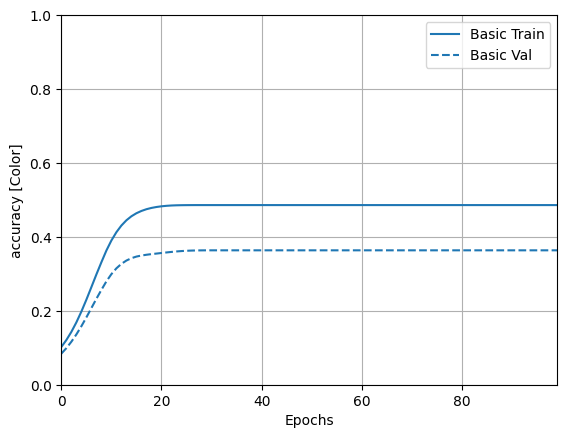

In [7392]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

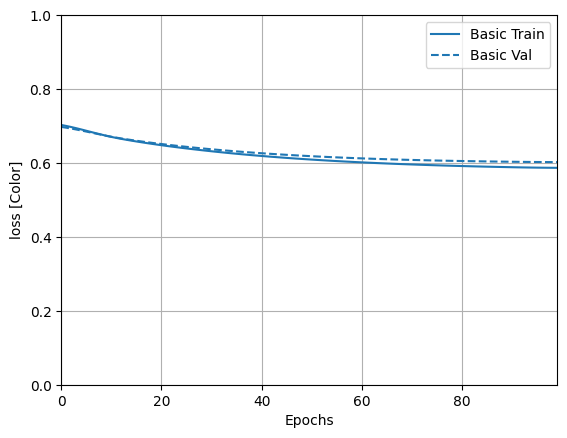

In [7393]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

In [7394]:
model.evaluate(x=train_dataset, y=train_labels)

8/8 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.4492


[0.5909490585327148, 0.44921875]

In [7395]:
model.evaluate(x=test_dataset, y=test_labels)

2/2 [==============================] - 0s 4ms/step - loss: 0.5779 - accuracy: 0.5938


[0.5779346823692322, 0.59375]

In [7396]:
data=[[255,158,114,182,141,64,244,235,208,18,38,32]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit_transform(data)
predictions = model.predict(data)
predictions= predictions
# Print the predictions
print(predictions)

1/1 [==============================] - 0s 54ms/step
[[0.48742038 0.31654847 0.29172945 0.28963378 0.31452566 0.26814163
  0.33284357]]


In [7397]:
# model.save("tone_prediction", save_format='h5')
# model.save("tone_prediction_14_06_23.h5")
# model.save("modeljam5pagi.h5")


In [7398]:
# reconstructed_model = keras.models.load_model("tone_prediction.h5")

In [7399]:
# reconstructed_model.summary()

In [7400]:
# data=[[255,158,114,182,141,64,244,235,208,18,38,32]]
# predictions = reconstructed_model.predict(data)
# predictions= predictions*100
# # Print the predictions
# print(predictions)

In [7401]:
# reconstructed_model = keras.models.load_model("tone_prediction.h5")
# reversed_layers = list(reversed(reconstructed_model.layers))
# reversed_model = tf.keras.models.Sequential(reversed_layers)


In [7402]:
# data=np.array([[0.08542435, 0.00977156, 0.01834051, 0.02325298, 0.01231119, 0.0082467, 0.02043331]])
# predictions=reversed_model.predict(data)
# print(predictions)

In [7403]:
#plt.imshow([[[x / 255 for x in test_input[0]]]])
#plt.show()

# plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
# plt.show()
# plt.imshow([[[x / 255 for x in predictions[0][3:6]]]])
# plt.show()
# plt.imshow([[[x / 255 for x in predictions[0][6:9]]]])
# plt.show()